The power of the model lies in the data. If the data are quirky, we are bound to get quirky results. Here, I explore certain statistics about the data to get a feel for the strengths and weaknesses of the dataset. 

In [56]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

# disable false positive warnings
pd.options.mode.chained_assignment = None

In [193]:
dataframe = pd.read_csv("Accidental_Drug_Related_Deaths__2012-2017.csv")
dataframe.rename(columns = {'Morphine (not heroin)': 'Morphine'},inplace=True)
drug_names = dataframe.columns[15:27]
print(dataframe.shape[0],"records")
dataframe.head()

4081 records


,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,Benzodiazepine,Methadone,Amphet,Tramad,Morphine,Other,Any Opioid,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,13-16336,11/09/2013,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)"
1,12-18447,12/29/2012,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
2,14-2758,02/18/2014,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"
3,14-13497,09/07/2014,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)"
4,13-14421,10/04/2013,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)"


Step 1: Clean up data. This can be dealing with missing values or standardizing values (change all 'y''s to 'Y).

In [194]:
# drop problematic columns
dataframe.drop(columns=["Other","Any Opioid"],inplace=True)
# drop records with undefined age
dataframe.dropna(subset=['Age'],inplace=True)
# replace NA's in drugs with N
dataframe[drug_names]=dataframe[drug_names].fillna(value="N")
# replace y's with Y's
dataframe.replace(to_replace="y",value="Y",inplace=True)
# take care of other discrepancies 
dataframe = dataframe[(dataframe[drug_names].isin(["Y","N"])).all(axis=1)]

print(dataframe.shape[0],"records")
dataframe.head()

4032 records


,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine,MannerofDeath,AmendedMannerofDeath,DeathLoc
0,13-16336,11/09/2013,Female,White,53.0,GROTON,NaN,NEW LONDON,GROTON,NaN,...,N,N,Y,N,N,N,N,Accident,NaN,"GROTON, CT\n(41.343693, -72.07877)"
1,12-18447,12/29/2012,Male,White,30.0,WOLCOTT,NaN,NEW HAVEN,WATERBURY,NaN,...,N,N,N,N,N,N,N,Accident,NaN,"WATERBURY, CT\n(41.554261, -73.043069)"
2,14-2758,02/18/2014,Male,White,43.0,ENFIELD,NaN,NaN,ENFIELD,NaN,...,Y,N,Y,N,N,N,N,Accident,NaN,"ENFIELD, CT\n(41.976501, -72.591985)"
3,14-13497,09/07/2014,Female,White,24.0,WALLINGFORD,NaN,NaN,WALLINGFORD,NaN,...,N,N,N,N,N,N,N,Accident,NaN,"WALLINGFORD, CT\n(41.454408, -72.818414)"
4,13-14421,10/04/2013,Female,White,26.0,WEST HAVEN,NaN,NEW HAVEN,WEST HAVEN,NaN,...,N,N,N,N,N,N,N,Accident,NaN,"WEST HAVEN, CT\n(41.272336, -72.949817)"


Step 2: Look at the statistics for each feature in the data.

In [195]:
dataframe.describe(include='all')

,CaseNumber,Date,Sex,Race,Age,Residence City,Residence State,Residence County,Death City,Death State,...,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine,MannerofDeath,AmendedMannerofDeath,DeathLoc
count,4032,4031,4030,4023,4032.000000,3924,2098,3311,4030,2155,...,4032,4032,4032,4032,4032,4032,4032,4025,518,4032
unique,4030,1760,2,11,NaN,447,19,84,306,9,...,2,2,2,2,2,2,2,5,418,338
top,17-537,08/18/2017,Male,White,NaN,HARTFORD,CT,HARTFORD,HARTFORD,CT,...,N,N,N,N,N,N,N,Accident,Acute Fentanyl Intoxication,"HARTFORD, CT\n(41.765775, -72.673356)"
freq,2,9,2956,3204,NaN,203,2009,775,368,1694,...,3117,3929,3021,3653,3932,3943,3999,3998,23,312
mean,NaN,NaN,NaN,NaN,41.681052,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,12.298990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# drug statistics
dataframe[drug_names].describe(include='all')

,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,EtOH,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine
count,4032,4032,4032,4032,4032,4032,4032,4032,4032,4032,4032,4032
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,Y,N,N,N,N,N,N,N,N,N,N,N
freq,2125,2875,2595,3509,3937,3117,3929,3021,3653,3932,3943,3999


There seems to be a lot more information than necesary. Let's restrict our features to "Sex", "Race", and "Age" and our drugs to Heroin, Cocaine, Fentanyl, and Benzodiazepine at the moment.

In [197]:
dataframe_junior = dataframe[["Sex","Race","Age","Heroin","Fentanyl","Cocaine","Benzodiazepine"]]
print(dataframe_junior.shape[0],"records")
dataframe_junior.head()

4032 records


,Sex,Race,Age,Heroin,Fentanyl,Cocaine,Benzodiazepine
0,Female,White,53.0,N,N,N,Y
1,Male,White,30.0,N,N,Y,N
2,Male,White,43.0,N,N,N,Y
3,Female,White,24.0,Y,Y,N,N
4,Female,White,26.0,Y,N,N,N


In [198]:
dataframe_junior.describe(include='all')

,Sex,Race,Age,Heroin,Fentanyl,Cocaine,Benzodiazepine
count,4030,4023,4032.000000,4032,4032,4032,4032
unique,2,11,NaN,2,2,2,2
top,Male,White,NaN,Y,N,N,N
freq,2956,3204,NaN,2125,2595,2875,3021
mean,NaN,NaN,41.681052,NaN,NaN,NaN,NaN
std,NaN,NaN,12.298990,NaN,NaN,NaN,NaN
min,NaN,NaN,14.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,31.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,42.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,51.000000,NaN,NaN,NaN,NaN


Step 3: Visualize the data and trim the dataset if necessary.

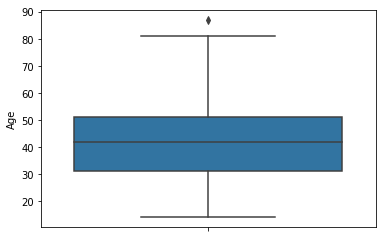

In [199]:
# boxplot for age
sb.boxplot(y='Age',data=dataframe_junior)

By the boxplot above, it seems the data is normally distributed and composed of a majority of middle-aged people (between 30 and 50). To go one step further, let's see the breakdown by other categorical indicators, such as race and sex.

Male 2956
Female 1074


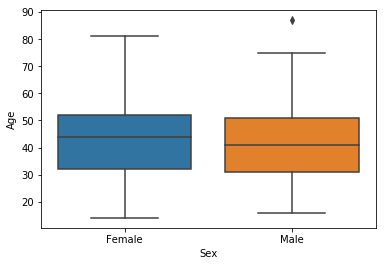

In [200]:
# boxplot for age by sex
print('Male',dataframe_junior.loc[dataframe_junior["Sex"]=='Male'].shape[0])
print('Female',dataframe_junior.loc[dataframe_junior['Sex']=='Female'].shape[0])
sb.boxplot(x="Sex",y="Age", data=dataframe_junior)

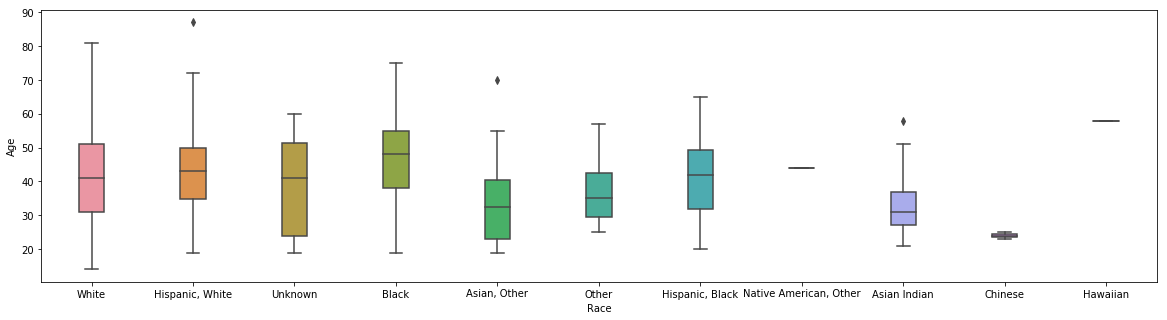

In [201]:
# boxplot for age by race
plt.figure(figsize=(20,5))
sb.boxplot(x="Race",y="Age",data=dataframe_junior,width=0.25)
plt.show()

It seems that males and females have nearly identical distributions. For race, we have a couple of mixed categories. Additionally, data for some races might not be that insightful. Let's inspect the size of these and remove them if they are insignificant.

In [202]:
# inspect slices of the dataframe for each race
flag = dataframe_junior['Race'] == 'Hispanic, White' 
print('hispanic, white',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Hispanic, Black' 
print('hispanic, black',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Asian, Other' 
print('asian, other',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'White' 
print('white',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Unknown' 
print('unknown',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Other' 
print('other',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Asian Indian' 
print('asian indian',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Chinese' 
print('chinese',dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Black'
print('black', dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Native American, Other'
print('native american, other', dataframe_junior.loc[flag].shape[0])

flag = dataframe_junior['Race'] == 'Hawaiian'
print('hawaiian', dataframe_junior.loc[flag].shape[0])

hispanic, white 428
hispanic, black 16
asian, other 14
white 3204
unknown 16
other 7
asian indian 9
chinese 2
black 325
native american, other 1
hawaiian 1


It appears that removing races such as "hispanic, black", "asian,other", and "unknown" will hardly make a dent in the dataset. It is important that I remove these because there is not enough information about them that the model can make inappropriate conclusions.

In [203]:
# keep significant populations
keep_hispanic_white = dataframe_junior['Race'] == 'Hispanic, White'
keep_white = dataframe_junior['Race'] == 'White'
keep_black = dataframe_junior['Race'] == 'Black'
dataframe_junior = dataframe_junior.loc[keep_hispanic_white | keep_white | keep_black]

print(dataframe_junior.shape[0],"records")
dataframe_junior.head()

3957 records


,Sex,Race,Age,Heroin,Fentanyl,Cocaine,Benzodiazepine
0,Female,White,53.0,N,N,N,Y
1,Male,White,30.0,N,N,Y,N
2,Male,White,43.0,N,N,N,Y
3,Female,White,24.0,Y,Y,N,N
4,Female,White,26.0,Y,N,N,N


Step 4: Visualize the data and identify strong predictors.

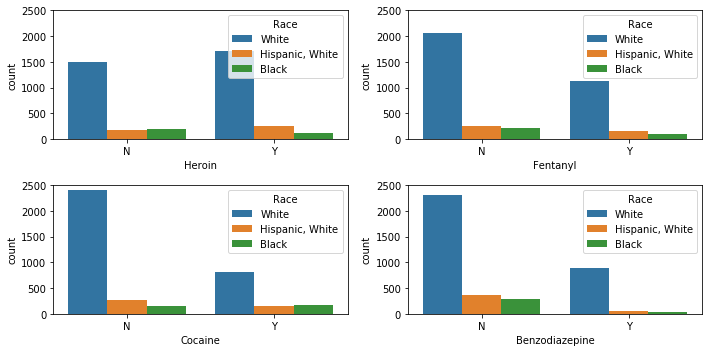

In [209]:
# relationship between race and drug death
fig, axes = plt.subplots(2,2,figsize=(10,5))

# set y axis
for ax_row in axes:
    for ax in ax_row:
        ax.set_ylim(0,2500)
        
sb.countplot(x="Heroin",hue="Race",data=dataframe_junior,ax=axes[0][0],order=["N","Y"])
sb.countplot(x="Fentanyl",hue="Race",data=dataframe_junior,ax=axes[0][1],order=["N","Y"])
sb.countplot(x="Cocaine",hue="Race",data=dataframe_junior,ax=axes[1][0],order=["N","Y"])
sb.countplot(x="Benzodiazepine",hue="Race",data=dataframe_junior,ax=axes[1][1],order=["N","Y"])
fig.tight_layout()

Seems that White people tend to OD on Heroin the most, then Fentanyl, followed by a tie between Cocaine and Benzodiazepine. Hispanic/White people tend to OD on Heroin as well, followed by a tie between Fentanyl and Cocaine, and lastly Benzodiazepine. Finally, Black people tend to OD on Cocaine, next a tie between Heroin and Fentanyl, and lastly a tie between Benzodiazepine.

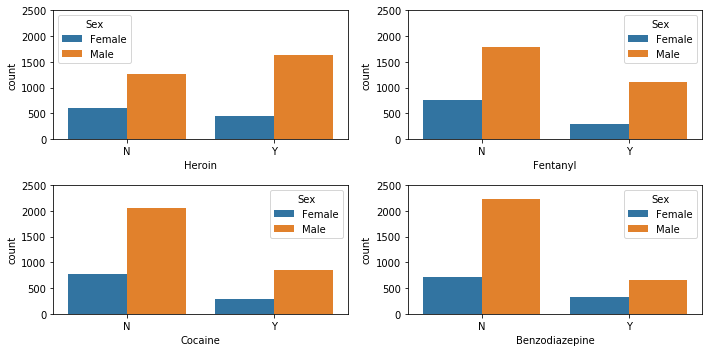

In [210]:
# relationship between sex and drug death
fig, axes = plt.subplots(2,2,figsize=(10,5))

# set y axis
for ax_row in axes:
    for ax in ax_row:
        ax.set_ylim(0,2500)

sb.countplot(x="Heroin",hue="Sex",data=dataframe_junior,ax=axes[0][0],order=["N","Y"])
sb.countplot(x="Fentanyl",hue="Sex",data=dataframe_junior,ax=axes[0][1],order=["N","Y"])
sb.countplot(x="Cocaine",hue="Sex",data=dataframe_junior,ax=axes[1][0],order=["N","Y"])
sb.countplot(x="Benzodiazepine",hue="Sex",data=dataframe_junior,ax=axes[1][1],order=["N","Y"])
fig.tight_layout()

Seems that the males tend to OD on Heroin, followed by Fentanyl, Cocaine, and Benzodiazepine. Females tend to OD on Heroin, followed by a three-way tie between the other three drugs. 

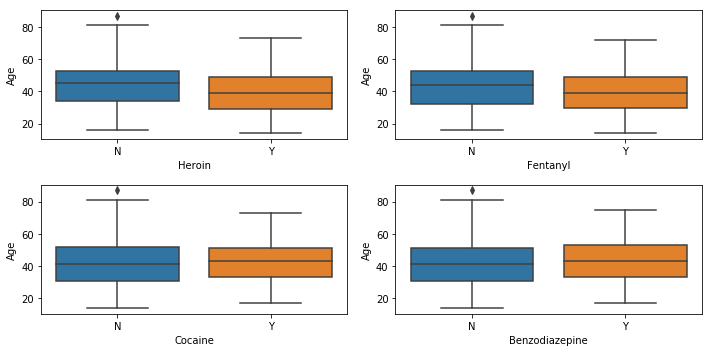

In [212]:
# relationship between age and drug death
fig, axes = plt.subplots(2,2,figsize=(10,5))
sb.boxplot(x="Heroin",y="Age",data=dataframe_junior,ax=axes[0][0],order=["N","Y"])
sb.boxplot(x="Fentanyl",y="Age",data=dataframe_junior,ax=axes[0][1],order=["N","Y"])
sb.boxplot(x="Cocaine",y="Age",data=dataframe_junior,ax=axes[1][0],order=["N","Y"])
sb.boxplot(x="Benzodiazepine",y="Age",data=dataframe_junior,ax=axes[1][1],order=["N","Y"])
fig.tight_layout()

Seems that age, on average, is the same among all the different drug deaths. Thus, it seems that drug death (of the drugs we have chosen) is independent of the ages in our age group. 

In [130]:
# TODO: add in step with chi-square and other quantifying measures of correlation to complement visual analysis

Conclusion: 2/3 of the features selected (race and sex) hint at some correlation with the target variables. The levels of correlation I considered are binary in that a uniform distribution signals no correlation while a non-uniform distribution signals correlation, weak or strong. This works for unordered categorical variables. If I were to train a multi-label classifier using this set-up, I would expect the model to be right at least 1/16 of the time, as a very simple model that makes random predictions would make correct predictions 1/16 of the time.